<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook 10</p></tp>
            <tp><p style="font-size:150%;text-align:center">Redes Bayesianas</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---


## **Estudiante: Paula Lorena López.**

# Objetivo

En este notebook estudiaremos una herramienta muy útil para representar situaciones de incertidumbre como las que aparecen, por ejemplo, en el mundo del Wumpus, aunque el rango de aplicaciones es muy amplio. Esta herramienta se llama las **redes bayesianas** y está basada, como su nombre lo indica, en la regla de Bayes.


Adaptado de Russell & Norvig (2016), caps. 13 y 14.


# Secciones

* [Implementación de la estructura de una red bayesiana.](#estructura)
* [Inferencia probabilística y consultas basadas en evidencia.](#inferencia)
* [Ejemplos más interesantes.](#ejemplos)


# Estructura de una red bayesiana  <a class="anchor" id="estructura">

Una **red bayesiana** está basada en un grafo dirigido acíclico, en donde cada vértice está etiquetado con una tabla de probabilidad condicional en función de su ascendencia. Para la implementación aquí realizada, usaremos la librería [pyAgrum](https://pyagrum.readthedocs.io/en/0.22.2/). 
    
Observe que pyAgrum requiere tener instalado el programa [graphviz](https://graphviz.org/). Para instalarlo en Ubuntu, puede correr la siguiente celda:

In [1]:
!sudo apt install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


Para instalación en otras versiones de Linux u otros sistemas operativos puede consultar la [documentación de graphviz](https://graphviz.org/download/).

Corra la siguiente celda para importar pyAgrum:

In [2]:
!pip install pyAgrum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import numpy as np
gum.config['notebook','potential_visible_digits']=3

** pyAgrum** For better visualizations, please install matplotlib-inline.
** pyAgrum** For better visualizations, please install matplotlib-inline.


Usaremos como ejemplo el razonamiento sobre los pozos en el mundo del Wumpus discutido en las diapositivas. Lo primero que debemos hacer es crear un objeto de clase `BayesNet`. En este ejemplo inicializaremos este objeto mediante el método `fastBN`, el cual permite incluir el grafo subyacente, toda vez que este es bastante sencillo:

In [4]:
bn=gum.fastBN('Pozo(2,0)->Brisa(1,0)<-Pozo(1,1)')
bn

(pyAgrum.BayesNet<double>@0x370a400) BN{nodes: 3, arcs: 2, domainSize: 8, dim: 12}

Debemos ahora incluir las probabilidades de los pozos y la probabilidad condicional de la brisa. Esto se realiza de la siguiente manera:

In [5]:
bn.cpt('Pozo(2,0)').fillWith([0.8,0.2])
bn.cpt('Pozo(1,1)').fillWith([0.8,0.2])
bn.cpt('Brisa(1,0)')[{'Pozo(2,0)': 1, 'Pozo(1,1)': 1}] = [0, 1]
bn.cpt('Brisa(1,0)')[{'Pozo(2,0)': 1, 'Pozo(1,1)': 0}] = [0, 1]
bn.cpt('Brisa(1,0)')[{'Pozo(2,0)': 0, 'Pozo(1,1)': 1}] = [0, 1]
bn.cpt('Brisa(1,0)')[{'Pozo(2,0)': 0, 'Pozo(1,1)': 0}] = [1, 0]

Y se visualiza bonito de la siguiente manera:

In [6]:
gnb.sideBySide(bn.cpt('Pozo(2,0)'),
               gnb.getBN(bn),
               bn.cpt('Pozo(1,1)'))
gnb.sideBySide(bn.cpt('Brisa(1,0)'),captions=['$P(Brisa_{(1,0)}|Pozo_{(2,0)},Pozo_{(1,1)})$'])

# Consultas <a class="anchor" id="inferencia">

Con esta red bayesiana podemos resolver consultas sobre cualquier cálculo de probabilidades en este escenario. Las consultas consisten en saber cuál es la probabilidad de que una variable (o variables) tomen un valor (o valores) determinados.

Para realizar una consulta, es necesario crear un objeto de consulta mediante el método `LazyPropagation`:

In [7]:
ie=gum.LazyPropagation(bn)

Consideraremos dos tipos de consultas. El primero es cuando no hay evidencia disponible. En este caso, la respuesta a la consulta es simplemente la **probabilidad marginal** de que las variables tomen los valores respectivos. 

Por ejemplo, podemos consultar la probabilidad de que haya un pozo en $(2,0)$ de la siguiente manera:

In [8]:
ie.makeInference()
ie.posterior('Pozo(2,0)')

(pyAgrum.Potential<double>@0x36eac80) 
  Pozo(2,0)        |
0        |1        |
---------|---------|
 0.8000  | 0.2000  |

El segundo tipo es cuando hay evidencia disponible $E$ (que viene dada en forma de un diccionario `{variable:valor}`). Aquí, la respuesta a la consulta es la **probabilidad condicional** de que las variables tomen los valores respectivos dada la evidencia. La evidencia se guardará mediante el método `setEvidence`. Por ejemplo, suponga que la evidencia es que hay brisa en $(1,0)$. La evidencia en este caso se guarda de la siguiente manera:

In [9]:
ie.setEvidence({'Brisa(1,0)':1})

Y volvemos a hacer la consulta:

In [10]:
ie.makeInference()
ie.posterior('Pozo(2,0)')

(pyAgrum.Potential<double>@0x36eac40) 
  Pozo(2,0)        |
0        |1        |
---------|---------|
 0.4444  | 0.5556  |

La librería pyAgrum es muy flexible y viene con métodos muy interesantes para visualización. Por ejemplo, podemos visualizar lado a lado las probabilidades a priori y a posteriori de $Pozo_{(2,0)}$:

Probabilidad a priori:


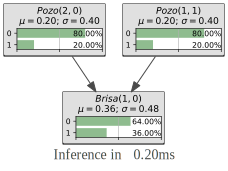

Probabilidad a posteriori:


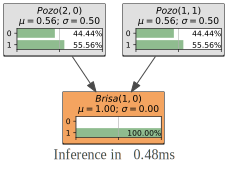

In [11]:
print("Probabilidad a priori:")
gnb.showInference(bn,evs={})
print("Probabilidad a posteriori:")
gnb.showInference(bn,evs={'Brisa(1,0)':1})

# Ejemplos <a class="anchor" id="ejemplos">
    
### Más Wumpus
    
Vamos a resolver ahora el ejemplo del mundo del Wumpus con el que terminamos las diapositivas de clase:
    
<img src="./imagenes/pozos.png" width="450">
    
Para poder hacer este cálculo, debemos crear la red bayesiana respectiva, representada en el siguiente diagrama:
    
<img src="./imagenes/rb1.png" width="600">   
    
Para ilustrar otros métodos de creación de redes bayesianas en PyAgrum, vamos a utilizar la misma red que ya teníamos, y le vamos a añadir los nodos, aristas y probabilidades que hacen falta.
    


In [12]:
variables = ['Pozo(0,2)', 'Brisa(0,1)']
for var in variables:
    bn.add(var, 2) # <= aquí el 2 es el número de posibles valores

bn

(pyAgrum.BayesNet<double>@0x370a400) BN{nodes: 5, arcs: 2, domainSize: 32, dim: 16}

Añadimos las aristas:

In [13]:
bn.addArc('Pozo(1,1)','Brisa(0,1)')
bn.addArc('Pozo(0,2)','Brisa(0,1)')
bn

(pyAgrum.BayesNet<double>@0x370a400) BN{nodes: 5, arcs: 4, domainSize: 32, dim: 22}

Y añadimos las probabilidades:

In [14]:
bn.cpt('Pozo(0,2)').fillWith([0.8,0.2])
bn.cpt('Brisa(0,1)')[{'Pozo(1,1)': 1, 'Pozo(0,2)': 1}] = [0, 1]
bn.cpt('Brisa(0,1)')[{'Pozo(1,1)': 1, 'Pozo(0,2)': 0}] = [0, 1]
bn.cpt('Brisa(0,1)')[{'Pozo(1,1)': 0, 'Pozo(0,2)': 1}] = [0, 1]
bn.cpt('Brisa(0,1)')[{'Pozo(1,1)': 0, 'Pozo(0,2)': 0}] = [1, 0]

In [15]:
gnb.sideBySide(bn.cpt('Pozo(0,2)'), bn.cpt('Pozo(1,1)'), bn.cpt('Pozo(2,0)')),
gnb.sideBySide(gnb.getBN(bn)),
gnb.sideBySide(bn.cpt('Brisa(0,1)'),
               gnb.sideBySide(captions=['']),
               bn.cpt('Brisa(1,0)'),
               captions=['$P(Brisa_{(0,1)}|Pozo_{(0,2)},Pozo_{(1,1)})$', '', '$P(Brisa_{(1,0)}|Pozo_{(2,0)},Pozo_{(1,1)})$'])


"G <!-- Brisa(1,0) --> Brisa(1,0) Brisa(1,0) <!-- Brisa(0,1) --> Brisa(0,1) Brisa(0,1) <!-- Pozo(2,0) --> Pozo(2,0) Pozo(2,0) <!-- Pozo(2,0)->Brisa(1,0) --> Pozo(2,0)->Brisa(1,0) <!-- Pozo(1,1) --> Pozo(1,1) Pozo(1,1) <!-- Pozo(1,1)->Brisa(1,0) --> Pozo(1,1)->Brisa(1,0) <!-- Pozo(1,1)->Brisa(0,1) --> Pozo(1,1)->Brisa(0,1) <!-- Pozo(0,2) --> Pozo(0,2) Pozo(0,2) <!-- Pozo(0,2)->Brisa(0,1) --> Pozo(0,2)->Brisa(0,1)"


""
""


In [16]:
ie=gum.LazyPropagation(bn)
ie.setEvidence({'Brisa(1,0)':1, 'Brisa(0,1)':1})
ie.makeInference()
ie.posterior('Pozo(1,1)')

(pyAgrum.Potential<double>@0x36ebce0) 
  Pozo(1,1)        |
0        |1        |
---------|---------|
 0.1379  | 0.8621  |

Probabilidad a priori:


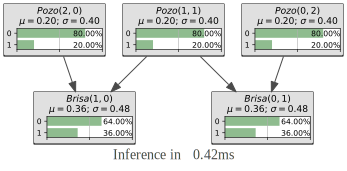

Probabilidad a posteriori incluyendo Brisa(1,0):


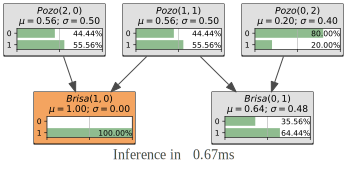

Nueva probabilidad a posteriori incluyendo Brisa(1,0)' y 'Brisa(0,1)


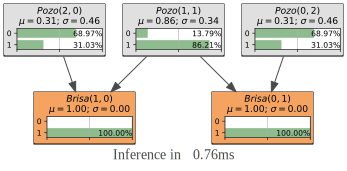

In [17]:
print("Probabilidad a priori:")
gnb.showInference(bn,evs={})
print("Probabilidad a posteriori incluyendo Brisa(1,0):")
gnb.showInference(bn,evs={'Brisa(1,0)':1})
print("Nueva probabilidad a posteriori incluyendo Brisa(1,0)' y 'Brisa(0,1)")
gnb.showInference(bn,evs={'Brisa(1,0)':1, 'Brisa(0,1)':1})

Aquí se pueden observar cosas muy interesantes. Por ejemplo, note que la probabilidad de $Pozo_{(2,0)}$ comienza en su valor original de 0.2. Al incluir la evidencia $Brisa_{(1,0)}$ la probabilidad de $Pozo_{(2,0)}$ aumenta a 0.56, pero luego disminuye a 0,31 cuando incluimos la evidencia de $Brisa_{(0,1)}$.

<a class="anchor" id="ej1"></a>**Ejercicio 1:** 

([Próximo ejercicio](#ej2))

Suponga que, después de todo, en la casilla $(0,1)$ no había un pozo. ¿Cuál es la probabilidad a posteriori de $Pozo_{(2,0)}$? Es decir, hay que encontrar:

$$P(Pozo_{(2,0)}|Brisa_{(1,0)},\neg Brisa_{(0,1)})$$

Utilice el método `chgEvidence(variable,valor)` para cambiar la evidencia.

La respuesta debe ser:

<img src="./imagenes/posterior.png" width="100"> 

In [18]:
ie.chgEvidence('Brisa(1,0)', 1)
ie.chgEvidence('Brisa(0,1)', 0)

ie.makeInference()

ie.posterior('Pozo(2,0)')

(pyAgrum.Potential<double>@0x3e2e7a0) 
  Pozo(2,0)        |
0        |1        |
---------|---------|
 0.0000  | 1.0000  |

---

### Regar el jardín

Considere la siguiente situación. Para tener un bonito jardín, es necesario que este esté húmedo la mayor parte del tiempo. La rutina diaria de María es chequear el clima. Si está nublado, usualmente no prende el roceador automático del jardín. Si no está nublado, a veces sí y a veces no lo prende. Si el roceador está funcionando o si llueve, el jardín estará mojado. Estas relaciones se ven reflejadas en la siguiente red bayesiana:

<img src="./imagenes/jardin.png" width="650">

Para hacer inferencias probabilisticas sobre esta situación, creamos el objeto `BayesNet`. Vamos a inicializar el grafo dirigido acíclico de manera rápida mediante la siguiente celda:

In [19]:
bn=gum.fastBN("Nublado->Roceador->JardinMojado<-Lluvia<-Nublado")
bn

(pyAgrum.BayesNet<double>@0x3ac9000) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

<a class="anchor" id="ej2"></a>**Ejercicio 2:** 

([Anterior ejercicio](#ej1)) ([Próximo ejercicio](#ej3))

Asigne las probabilidades de cada uno de los nodos y dibuje la red correspondiente:

In [20]:
# AQUI PROBABILIDADES PARA LA VARIABLE Nublado
bn.cpt('Nublado').fillWith([0.5, 0.5])

# AQUI PROBABILIDADES PARA LA VARIABLE Roceador
bn.cpt('Roceador')[{'Nublado': 1}] = [0.9, 0.1]
bn.cpt('Roceador')[{'Nublado': 0}] = [0.5, 0.5]
# AQUI PROBABILIDADES PARA LA VARIABLE Lluvia
bn.cpt('Lluvia')[{'Nublado': 1}] = [0.2, 0.8]
bn.cpt('Lluvia')[{'Nublado': 0}] = [0.8, 0.2]
# AQUI PROBABILIDADES PARA LA VARIABLE JardinMojado
bn.cpt('JardinMojado')[{'Lluvia' : 1, 'Roceador': 1}] = [0.01, 0.99]
bn.cpt('JardinMojado')[{'Lluvia' : 1, 'Roceador': 0}] = [0.1, 0.9]
bn.cpt('JardinMojado')[{'Lluvia' : 0, 'Roceador': 1}] = [0.1, 0.9]
bn.cpt('JardinMojado')[{'Lluvia' : 0, 'Roceador': 0}] = [1, 0]

Al correr la celda de código a continuación, se debe obtener lo siguiente:

<img src="./imagenes/jardin1.png" width="500">

In [21]:
gnb.sideBySide(bn.cpt('Nublado'))
gnb.sideBySide(
  gnb.getSideBySide(bn.cpt('Roceador')),
  gnb.getBN(bn,size="3!"),
  gnb.getSideBySide(bn.cpt('Lluvia')))
gnb.sideBySide(bn.cpt('JardinMojado'))

---

<a class="anchor" id="ej3"></a>**Ejercicio 3:** 

([Anterior ejercicio](#ej2)) ([Próximo ejercicio](#ej4))

Utilice un objeto `LazyPropagation` y los métodos `makeInference`, `posterior` y `setEvidence` para responder las siguientes preguntas sobre la situación del jardín:

* ¿Cuál es la probabilidad de que el jardín esté mojado? $P(JardinMojado)$
* Dado que está nublado, ¿cuál es la probabilidad de que el jardín esté mojado? $P(JardinMojado|Nublado)$
* Dado que el jardín está mojado, cuál es la probabilidad de que el roceador esté encendido? $P(Roceador|JardinMojado)$

Observe que al correr la celda a continuación se debe obtener la siguiente respuesta:

<img src="./imagenes/jardin2.png" width="600">

In [22]:
ie=gum.LazyPropagation(bn)

In [23]:
ie.makeInference()
ie.posterior('JardinMojado')

(pyAgrum.Potential<double>@0x3e18900) 
  JardinMojado     |
0        |1        |
---------|---------|
 0.3529  | 0.6471  |

In [24]:
ie.setEvidence({'Nublado':1})
ie.makeInference()
ie.posterior('JardinMojado')

(pyAgrum.Potential<double>@0x3e197c0) 
  JardinMojado     |
0        |1        |
---------|---------|
 0.2548  | 0.7452  |

In [25]:
ie.setEvidence({'JardinMojado':1})
ie.makeInference()
ie.posterior('Roceador')

(pyAgrum.Potential<double>@0x3e19960) 
  Roceador         |
0        |1        |
---------|---------|
 0.5702  | 0.4298  |

Probabilidad de que el jardín esté mojado:


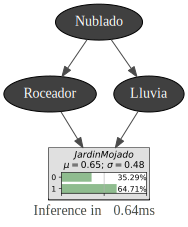

Probabilidad de que el jardín esté mojado dado que está nublado:


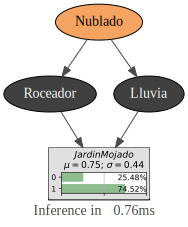

Probabilidad de que el roceador esté encendido dado que el jardín está mojado:


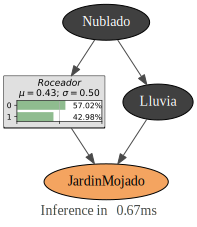

In [26]:
print('Probabilidad de que el jardín esté mojado:')
gnb.showInference(bn,evs={},targets={'JardinMojado'})
print('Probabilidad de que el jardín esté mojado dado que está nublado:')
gnb.showInference(bn,evs={'Nublado':1},targets={'JardinMojado'})
print('Probabilidad de que el roceador esté encendido dado que el jardín está mojado:')
gnb.showInference(bn,evs={'JardinMojado':1},targets={'Roceador'})

---

### Alarma antirobos

Usted ha instalado un sistema de alarma para su casa, el cual es muy confiable para detectar robos, pero en ciertas ocasiones también responde a terremotos leves. Usted tiene dos vecinos, Juan y María, que han prometido llamarlo a su trabajo cuando escuchen la alarma. Juan casi siempre llama cuando escucha la alarma, pero a veces confunde el sonido del teléfono con la alarma y hará la llamada. Por otro lado, María escucha música a todo volumen y por eso algunas veces no escucha la alarma. Las probabilidades y dependencias de esta situación se pueden representar mediante la siguiente red bayesiana:

<img src="./imagenes/alarma.png" width="600">

<a class="anchor" id="ej4"></a>**Ejercicio 4:** 

([Anterior ejercicio](#ej3)) ([Próximo ejercicio](#ej5))

Implemente la red bayesiana correspondiente a esta situación y dibuje la red.

In [27]:
bn=gum.fastBN('Robo->Alarma->JuanLlama')

In [28]:
variables = ['Temblor', 'MariaLlama']
for var in variables:
    bn.add(var, 2) # <= aquí el 2 es el número de posibles valores

In [29]:
bn.addArc('Temblor', 'Alarma')
bn.addArc('Alarma', 'MariaLlama')
bn

(pyAgrum.BayesNet<double>@0x393b800) BN{nodes: 5, arcs: 4, domainSize: 32, dim: 20}

---

<a class="anchor" id="ej5"></a>**Ejercicio 5:** 

([Anterior ejercicio](#ej4)) ([Próximo ejercicio](#ej6))
    
Utilice la red bayesiana para determinar las siguientes probabilidades

* Probabilidad de que suene la alarma.
* Probabilidad de que haya un robo dado que Juan y María llaman.

In [30]:
bn.cpt('Robo').fillWith([0.999, 0.001])
bn.cpt('Temblor').fillWith([0.998, 0.002])

bn.cpt('Alarma')[{'Temblor': 1, 'Robo': 1}] = [0.05, 0.95]
bn.cpt('Alarma')[{'Temblor': 1, 'Robo': 0}] = [0.71, 0.29]
bn.cpt('Alarma')[{'Temblor': 0, 'Robo': 1}] = [0.06, 0.94]
bn.cpt('Alarma')[{'Temblor': 0, 'Robo': 0}] = [0.999, 0.001]

bn.cpt('JuanLlama')[{'Alarma': 1}] = [0.1, 0.9]
bn.cpt('JuanLlama')[{'Alarma': 0}] = [0.95, 0.05]

bn.cpt('MariaLlama')[{'Alarma': 1}] = [0.3, 0.7]
bn.cpt('MariaLlama')[{'Alarma': 0}] = [0.99, 0.01]

In [31]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.posterior('Alarma')

(pyAgrum.Potential<double>@0x3ad8460) 
  Alarma           |
0        |1        |
---------|---------|
 0.9975  | 0.0025  |

In [32]:
ie.setEvidence({'JuanLlama': 1, 'MariaLlama':1})
ie.makeInference()
ie.posterior('Robo')

(pyAgrum.Potential<double>@0x3ad81a0) 
  Robo             |
0        |1        |
---------|---------|
 0.7158  | 0.2842  |

---

<a class="anchor" id="ej6"></a>**Ejercicio 6:** 

([Anterior ejercicio](#ej5)) ([Próximo ejercicio](#ej7))

Cree una red bayesiana para representar la relación entre el Wumpus y el hedor. Observe que esta relación se diferencia de la que existe entre la brisa y los posos en que sólo hay un Wumpus. Para hacer la implementación, considere:

* Crear una [Labelizedvariable](https://pyagrum.readthedocs.io/en/1.3.2/randomVariables.html#pyAgrum.LabelizedVariable) 'Wumpus' con 16 posibles valores.
* Crear una variable 'Hedor(x, y)' para cada una de las 16 casillas.
* Crear los arcos respectivos.
* Crear la tabla de probabilidad condicional de cada variable 'Hedor(x, y)', que debe valer 1 si el valor de la variable 'Wumpus' (que es una casilla) es una casilla adyacente a $(x, y)$ y es 0 en caso contrario.

Al correr las siguientes celdas se debe obtener:

<img src="./imagenes/wumpus.png" width="400"/>

y

<img src="./imagenes/hedor.png" width="90"/>



In [33]:
LCuadro = 4

In [34]:
def Adyacentes(x,y):
    ady = []
    if x==0 and y==0:
        ady.append(((x+1, y), (x, y+1)))
    elif x==0 and y==LCuadro-1:
        ady.append(((x+1, y), (x, y-1)))
    elif x==LCuadro-1 and y==0:
        ady.append(((x-1, y), (x, y+1)))
    elif x==LCuadro-1 and y==LCuadro-1:
        ady.append(((x, y-1), (x-1, y)))
    elif(x==0 and (y!=0 or y!=LCuadro-1)):
        ady.append(((x,y-1), (x+1, y), (x, y+1)))
    elif(x==LCuadro-1 and (y!=0 or y!=LCuadro-1)):
        ady.append(((x,y-1), (x-1, y), (x, y+1)))
    elif(y==0 and (x!=0 or x!=LCuadro-1)):
        ady.append(((x+1, y), (x, y+1), (x-1, y)))
    elif(y==LCuadro-1 and (x!=0 or x!=LCuadro-1)):
        ady.append(((x+1, y), (x, y-1), (x-1, y)))
    else:
        ady.append(((x,y-1), (x-1,y), (x,y+1), (x+1,y)))
    return ady

In [35]:
def final(x, y):
    dic = {}
    k = 0
    for i in range(LCuadro):
        for j in range(LCuadro):
            dic[i, j] = k
            k +=1
    ady = Adyacentes(x, y)
    val = []
    for i in ady[0]:
        var = dic[i]
        val.append(var)
    return val

### Casilla en donde está el Wumpus

In [36]:
x = 1
y = 1

In [37]:
bn=gum.fastBN(f'Hedor({x},{y})')

### Se crean los respectivos arcos.

In [38]:
bn=gum.fastBN(f'Hedor({x},{y})')
variables = ['Wumpus']
for var in variables:
    bn.add(var, 16)
bn.addArc('Wumpus', f'Hedor({x},{y})')

Se creaan sus respectivas probabilidades teniendo en cuenta sus adyacentes.

In [39]:
elem = final(x,y)
bn.cpt('Wumpus').fillWith([0.06 for _ in range(16)])
for i in range(16):
    if i in elem:
        bn.cpt(f'Hedor({x},{y})')[{'Wumpus': i}] = [0, 1]
    else:
        bn.cpt(f'Hedor({x},{y})')[{'Wumpus': i}] = [1, 0]

In [40]:
bn.cpt('Wumpus')

(pyAgrum.Potential<double>@0x3912100) 
  Wumpus                                                                                                                                                       |
0        |1        |2        |3        |4        |5        |6        |7        |8        |9        |10       |11       |12       |13       |14       |15       |
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.0600  | 0.0600  | 0.0600  | 0.0600  | 0.0600  | 0.0600  | 0.0600  | 0.0600  | 0.0600  | 0.0600  | 0.0600  | 0.0600  | 0.0600  | 0.0600  | 0.0600  | 0.0600  |

In [41]:
bn.cpt(f'Hedor({x},{y})')

(pyAgrum.Potential<double>@0x3912b80) 
      ||  Hedor(1,1)       |
Wumpus||0        |1        |
------||---------|---------|
0     || 1.0000  | 0.0000  |
1     || 0.0000  | 1.0000  |
2     || 1.0000  | 0.0000  |
3     || 1.0000  | 0.0000  |
4     || 0.0000  | 1.0000  |
5     || 1.0000  | 0.0000  |
[...4 more line(s) ...]
10    || 1.0000  | 0.0000  |
11    || 1.0000  | 0.0000  |
12    || 1.0000  | 0.0000  |
13    || 1.0000  | 0.0000  |
14    || 1.0000  | 0.0000  |
15    || 1.0000  | 0.0000  |

---

<a class="anchor" id="ej7"></a>**Ejercicio 7:** 

([Anterior ejercicio](#ej6))

Compruebe que la inferencia a partir de la evidencia de que hay hedor en (1, 1) es que las casillas 1, 4, 6 y 9 tienen probabilidad 0.25 de que esté el Wumpus. 


In [42]:
ie=gum.LazyPropagation(bn)

In [43]:
ie.setEvidence({f'Hedor({x},{y})':1})
ie.makeInference()
ie.posterior('Wumpus')

(pyAgrum.Potential<double>@0x3ad8ee0) 
  Wumpus                                                                                                                                                       |
0        |1        |2        |3        |4        |5        |6        |7        |8        |9        |10       |11       |12       |13       |14       |15       |
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.0000  | 0.2500  | 0.0000  | 0.0000  | 0.2500  | 0.0000  | 0.2500  | 0.0000  | 0.0000  | 0.2500  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |

---

En este notebook usted aprendió:

* Implementar redes bayesianas mediante el paquete `pyAgrum`.
* Realizar inferencias sobre probabilidades con o sin evidencia adicional mediante redes bayesianas.